In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pymc

In [4]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)


In [5]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

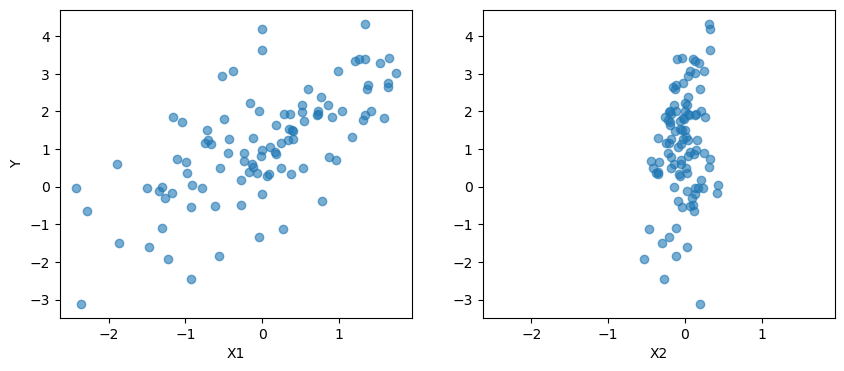

In [6]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [7]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")


Running on PyMC v5.9.0


In [19]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Uniform("alpha", lower=-10, upper=10)
    beta = pm.Uniform("beta", lower=-10, upper=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [20]:
basic_model = pm.Model()

with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

SamplingError: Cannot sample from the model, since the model does not contain any free variables.